In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Task 7.7 — Numerical Study of Percolation in ER Networks

In this task we numerically investigate the percolation phenomenon in Erdős–Rényi networks.

For different values of the average degree ⟨k⟩, we generate ER graphs and compute the size of the largest connected component.
The fraction of nodes belonging to the largest component is used as an estimate of the percolation order parameter P∞.

The goal is to verify numerically that the percolation threshold occurs at ⟨k⟩ ≈ 1, in agreement with the theoretical prediction.


In [2]:
def largest_component_fraction(G):
    if G.number_of_nodes() == 0:
        return 0.0
    components = nx.connected_components(G)
    largest = max(components, key=len)
    return len(largest) / G.number_of_nodes()


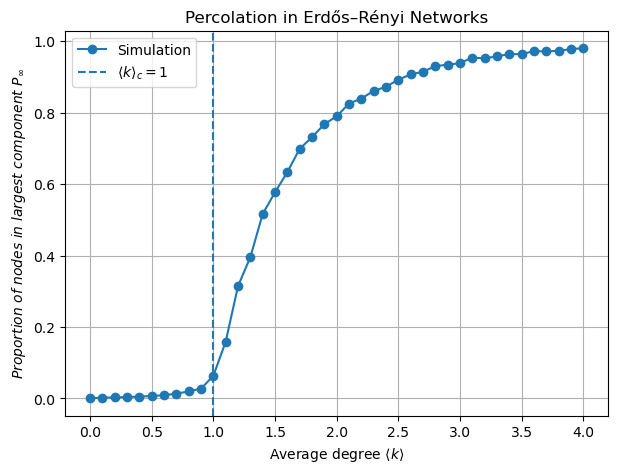

In [3]:
N = 2000
k_values = np.linspace(0, 4, 41)
num_realizations = 10

P_infty = []

for k_avg in k_values:
    p = k_avg / (N - 1)
    values = []
    
    for _ in range(num_realizations):
        G = nx.erdos_renyi_graph(N, p)
        values.append(largest_component_fraction(G))
    
    P_infty.append(np.mean(values))

plt.figure(figsize=(7,5))
plt.plot(k_values, P_infty, marker='o', label=r'Simulation')
plt.axvline(1.0, linestyle='--', label=r'$\langle k \rangle_c = 1$')
plt.xlabel(r'Average degree $\langle k \rangle$')
plt.ylabel(r'$Proportion\ of\ nodes\ in\ largest\ component\ P_{\infty}$')
plt.title('Percolation in Erdős–Rényi Networks')
plt.legend()
plt.grid()
plt.show()


### Task 7.18 — Robustness of Networks under Failures and Attacks

In this task we study the robustness of complex networks by removing nodes and observing the response of the network structure.

Two network models are considered:
- Erdős–Rényi (ER) networks,
- Barabási–Albert (BA) scale-free networks.

Two removal strategies are analyzed:
- random failures, where nodes are removed uniformly at random,
- targeted attacks, where nodes with the highest degree are removed first.

After removing a fraction q of nodes, the size of the largest connected component is measured.


In [4]:
def giant_component_after_removal(G, q, mode='random'):
    G = G.copy()
    N = G.number_of_nodes()
    num_remove = int(q * N)

    if num_remove == 0:
        return largest_component_fraction(G)

    if mode == 'random':
        nodes_to_remove = np.random.choice(list(G.nodes()), num_remove, replace=False)
    elif mode == 'targeted':
        degrees = dict(G.degree())
        nodes_sorted = sorted(degrees, key=degrees.get, reverse=True)
        nodes_to_remove = nodes_sorted[:num_remove]
    else:
        raise ValueError("mode must be 'random' or 'targeted'")

    G.remove_nodes_from(nodes_to_remove)

    if G.number_of_nodes() == 0:
        return 0.0

    return largest_component_fraction(G)


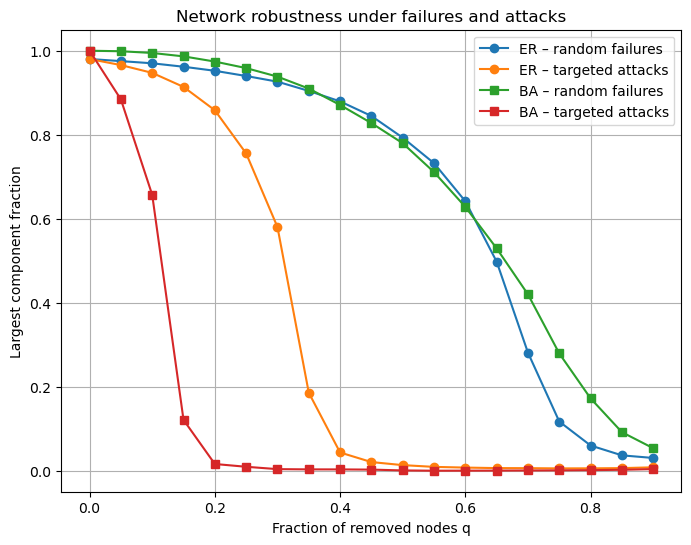

In [5]:
N = 2000
k_avg = 4
p = k_avg / (N - 1)
m_ba = k_avg // 2

qs = np.linspace(0, 0.9, 19)
num_realizations = 100

results = {
    'ER_random': [],
    'ER_targeted': [],
    'BA_random': [],
    'BA_targeted': []
}

for q in qs:
    er_r, er_t, ba_r, ba_t = [], [], [], []

    for _ in range(num_realizations):
        G_er = nx.erdos_renyi_graph(N, p)
        G_ba = nx.barabasi_albert_graph(N, m_ba)

        er_r.append(giant_component_after_removal(G_er, q, 'random'))
        er_t.append(giant_component_after_removal(G_er, q, 'targeted'))
        ba_r.append(giant_component_after_removal(G_ba, q, 'random'))
        ba_t.append(giant_component_after_removal(G_ba, q, 'targeted'))

    results['ER_random'].append(np.mean(er_r))
    results['ER_targeted'].append(np.mean(er_t))
    results['BA_random'].append(np.mean(ba_r))
    results['BA_targeted'].append(np.mean(ba_t))

plt.figure(figsize=(8,6))
plt.plot(qs, results['ER_random'], 'o-', label='ER – random failures')
plt.plot(qs, results['ER_targeted'], 'o-', label='ER – targeted attacks')
plt.plot(qs, results['BA_random'], 's-', label='BA – random failures')
plt.plot(qs, results['BA_targeted'], 's-', label='BA – targeted attacks')

plt.xlabel('Fraction of removed nodes q')
plt.ylabel('Largest component fraction')
plt.title('Network robustness under failures and attacks')
plt.legend()
plt.grid()
plt.show()



### Task 7.19 — Interpretation of Robustness Results

Under random failures, Barabási–Albert (BA) and Erdős–Rényi (ER) networks show similar robustness. However, under targeted attacks on highly connected nodes, ER graphs are more resilient than BA graphs. This is due to the scale-free structure of BA networks, where a small number of hubs formed by preferential attachment dominate connectivity, making the network highly vulnerable to their removal.